# Data Collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
AMZN=pd.read_csv('AMZN.csv')
BRKA=pd.read_csv('BRK-A.csv')
GOOG=pd.read_csv('GOOG.csv')
AAPL=pd.read_csv('AAPL.csv')
TSLA=pd.read_csv('TSLA.csv')
NSFT=pd.read_csv('MSFT.csv')
NOK=pd.read_csv('NOK.csv')
NVDA=pd.read_csv('NVDA.csv')
stock_dataframes = {
    'AMZN': AMZN,
    'BRK-A': BRKA,
    'GOOG': GOOG,
    'AAPL': AAPL,
    'TSLA': TSLA,
    'NSFT': NSFT,
    'NOK': NOK,
    'NVDA': NVDA
}
# Khoảng thời gian cần lọc
start_date = '2010-06-29'
end_date = '2022-09-30'

# Xử lý dữ liệu cho từng cổ phiếu
for ticker, df in stock_dataframes.items():
    # Explicitly specify the date format
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    # Lọc dữ liệu theo khoảng thời gian
    df = df.loc[start_date:end_date]

    # Chỉ giữ lại các cột cần thiết
    df = df[['Adjusted Close']]  # Giữ lại cột 'Adj Close' để tính toán lợi nhuận
    # Cập nhật lại DataFrame
    stock_dataframes[ticker] = df
stock_dataframes

{'AMZN':             Adjusted Close
 Date                      
 2010-06-29        5.430500
 2010-06-30        5.463000
 2010-07-01        5.548000
 2010-07-02        5.457000
 2010-07-06        5.503000
 ...                    ...
 2022-09-26      115.150002
 2022-09-27      114.410004
 2022-09-28      118.010002
 2022-09-29      114.800003
 2022-09-30      113.000000
 
 [3087 rows x 1 columns],
 'BRK-A':             Adjusted Close
 Date                      
 2010-06-29        120199.0
 2010-06-30        120000.0
 2010-07-01        118095.0
 2010-07-02        115500.0
 2010-07-06        116505.0
 ...                    ...
 2022-09-26        399128.0
 2022-09-27        401490.0
 2022-09-28        410705.0
 2022-09-29        406700.0
 2022-09-30        406470.0
 
 [3087 rows x 1 columns],
 'GOOG':             Adjusted Close
 Date                      
 2010-06-29       11.314092
 2010-06-30       11.082211
 2010-07-01       10.946221
 2010-07-02       10.872995
 2010-07-06       10.86

# Data Preprocessing

In [ ]:
print(AMZN.isnull().sum())
print(BRKA.isnull().sum())
print(GOOG.isnull().sum())
print(AAPL.isnull().sum())
print(TSLA.isnull().sum())
print(NSFT.isnull().sum())
print(NOK.isnull().sum())
print(NVDA.isnull().sum())

Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64
Low               0
Open              0
Volume            0
High     

In [ ]:
daily_returns = {ticker: df['Adjusted Close'].pct_change().dropna() for ticker, df in stock_dataframes.items()}

# Chuyển đổi dictionary thành DataFrame
daily_returns_df = pd.DataFrame(daily_returns)
daily_returns_df.head(5)

,AMZN,BRK-A,GOOG,AAPL,TSLA,NSFT,NOK,NVDA
Date,,,,,,,,
2010-06-30,0.005985,-0.001656,-0.020495,-0.018113,-0.002511,-0.012870,0.016209,-0.025763
2010-07-01,0.015559,-0.015875,-0.012271,-0.012126,-0.078473,0.006519,0.025767,0.016650
2010-07-02,-0.016402,-0.021974,-0.006690,-0.006197,-0.125683,0.004750,0.008373,-0.012524
2010-07-06,0.008430,0.008701,-0.001100,0.006844,-0.160937,0.023636,-0.005931,-0.010732
2010-07-07,0.030620,0.029046,0.032403,0.040381,-0.019243,0.020151,0.042959,0.048323


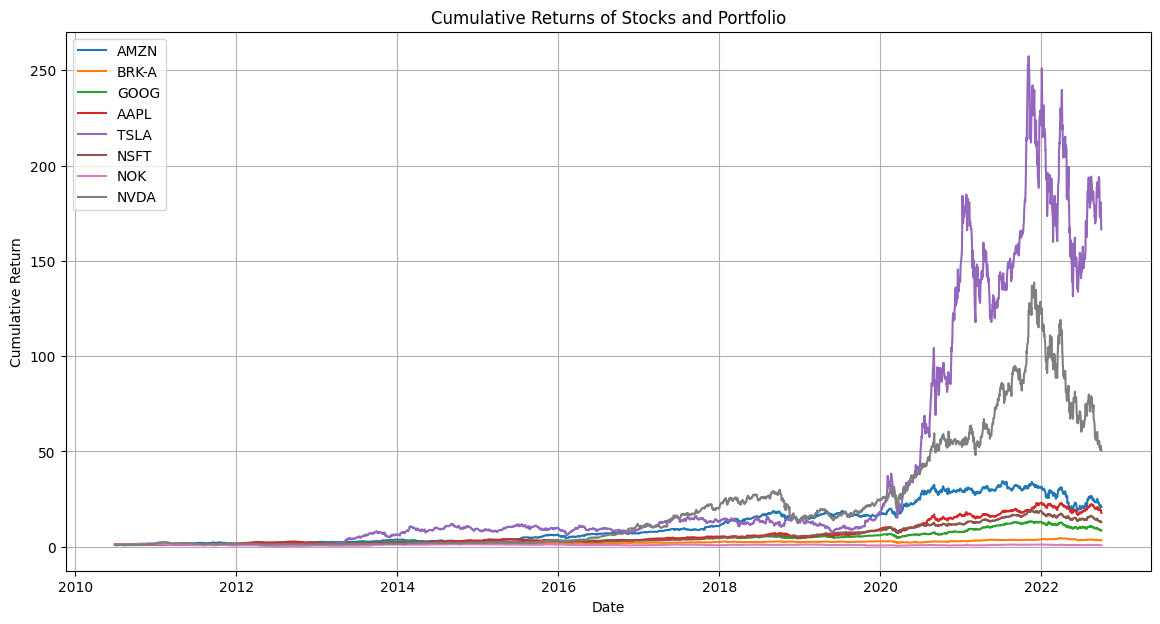

array([ 20.8083969 ,   3.38164211,   8.49825193,  17.6915307 ,
       166.54454618,  12.90168198,   0.77361677,  50.42205271])

In [ ]:
cumulative_returns = (daily_returns_df + 1).cumprod()
plt.figure(figsize=(14, 7))

for ticker in daily_returns_df.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.title('Cumulative Returns of Stocks and Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()
final_cumulative_return = cumulative_returns[-1:].values[0]
final_cumulative_return

# Portfolio Returns and Risk

In [ ]:
mean_returns = daily_returns_df.mean() * 252

# Calculate covariance matrix
cov_matrix = daily_returns_df.cov() * 252

# Calculate volatility (annualized standard deviation)
volatility = daily_returns_df.std() * np.sqrt(252)

# Print the results
print("Mean Returns:\n", mean_returns)
print("\nCovariance Matrix:\n", cov_matrix)
print("\nVolatility:\n", volatility)

Mean Returns:
 AMZN     0.300618
BRK-A    0.117160
GOOG     0.210051
AAPL     0.274834
TSLA     0.578378
NSFT     0.241898
NOK      0.077491
NVDA     0.416937
dtype: float64

Covariance Matrix:
            AMZN     BRK-A      GOOG      AAPL      TSLA      NSFT       NOK  \
AMZN   0.105618  0.022149  0.051522  0.044315  0.064220  0.046324  0.036408   
BRK-A  0.022149  0.035327  0.024126  0.024074  0.027875  0.025021  0.028110   
GOOG   0.051522  0.024126  0.070916  0.041570  0.050600  0.043842  0.034117   
AAPL   0.044315  0.024074  0.041570  0.080118  0.056087  0.042526  0.037942   
TSLA   0.064220  0.027875  0.050600  0.056087  0.322667  0.051705  0.048777   
NSFT   0.046324  0.025021  0.043842  0.042526  0.051705  0.065961  0.035519   
NOK    0.036408  0.028110  0.034117  0.037942  0.048777  0.035519  0.197035   
NVDA   0.066137  0.032966  0.059882  0.061861  0.090823  0.063834  0.052368   

           NVDA  
AMZN   0.066137  
BRK-A  0.032966  
GOOG   0.059882  
AAPL   0.061861  
TSL

In [ ]:
num_portfolios = 100

# Khởi tạo mảng để lưu trữ kết quả
# Store weights for each portfolio in a separate list
results = np.zeros((2, num_portfolios))
portfolio_weights = []

# Vòng lặp để tạo ngẫu nhiên trọng số danh mục đầu tư và tính toán lợi nhuận và độ biến động
for i in range(num_portfolios):
    weights = np.random.random(len(daily_returns_df.columns))
    weights /= np.sum(weights)

    # Tính toán lợi nhuận và độ biến động của danh mục đầu tư
    portfolio_return = np.sum(mean_returns * weights)  # Annualized return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    # Lưu trữ kết quả
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    portfolio_weights.append(weights) # Append weights to the list

# Chuyển đổi kết quả thành DataFrame để dễ dàng hiển thị
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility'])
# Add weights to the DataFrame
results_df['Weights'] = portfolio_weights

# Hiển thị một vài kết quả đầu tiên
print(results_df.head())
print(results_df.tail())

     Return  Volatility                                            Weights
0  0.199429    0.205534  [0.09836100267773282, 0.2716680235066498, 0.11...
1  0.318277    0.261589  [0.11036242274706975, 0.12744095321408608, 0.0...
2  0.306752    0.252070  [0.07397416430178182, 0.04228663136405609, 0.1...
3  0.316857    0.253649  [0.09210565717535105, 0.15921837384997847, 0.0...
4  0.213446    0.228418  [0.041732099447586886, 0.11360360011548627, 0....
      Return  Volatility                                            Weights
95  0.263768    0.240987  [0.127884779190633, 0.07342888149397682, 0.255...
96  0.236986    0.250988  [0.1911912989648646, 0.02314611636345554, 0.22...
97  0.293312    0.257484  [0.21132779673295093, 0.04951809942926381, 0.1...
98  0.294517    0.260037  [0.051860160126006055, 0.12334637660911668, 0....
99  0.273443    0.228540  [0.0630502601924782, 0.19799315477805893, 0.00...


# Sharpe Ratio

In [ ]:
risk_free_rate=0.0231
sharpe_ratio = (results_df['Return'] - risk_free_rate) / results_df['Volatility']
results_df['Sharpe Ratio'] = sharpe_ratio
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_idx]
print(results_df)
print("Portfolio with the highest Sharpe Ratio:\n")
print(f"Return: {max_sharpe_portfolio['Return']:.5f}")
print(f"Volatility: {max_sharpe_portfolio['Volatility']:.5f}")
print(f"Sharpe Ratio: {max_sharpe_portfolio['Sharpe Ratio']:.5f}")
print(f"Weights:\n{dict(zip(daily_returns_df.columns, max_sharpe_portfolio['Weights']))}")

      Return  Volatility                                            Weights  \
0   0.199429    0.205534  [0.09836100267773282, 0.2716680235066498, 0.11...   
1   0.318277    0.261589  [0.11036242274706975, 0.12744095321408608, 0.0...   
2   0.306752    0.252070  [0.07397416430178182, 0.04228663136405609, 0.1...   
3   0.316857    0.253649  [0.09210565717535105, 0.15921837384997847, 0.0...   
4   0.213446    0.228418  [0.041732099447586886, 0.11360360011548627, 0....   
..       ...         ...                                                ...   
95  0.263768    0.240987  [0.127884779190633, 0.07342888149397682, 0.255...   
96  0.236986    0.250988  [0.1911912989648646, 0.02314611636345554, 0.22...   
97  0.293312    0.257484  [0.21132779673295093, 0.04951809942926381, 0.1...   
98  0.294517    0.260037  [0.051860160126006055, 0.12334637660911668, 0....   
99  0.273443    0.228540  [0.0630502601924782, 0.19799315477805893, 0.00...   

    Sharpe Ratio  
0       0.857909  
1       1.128

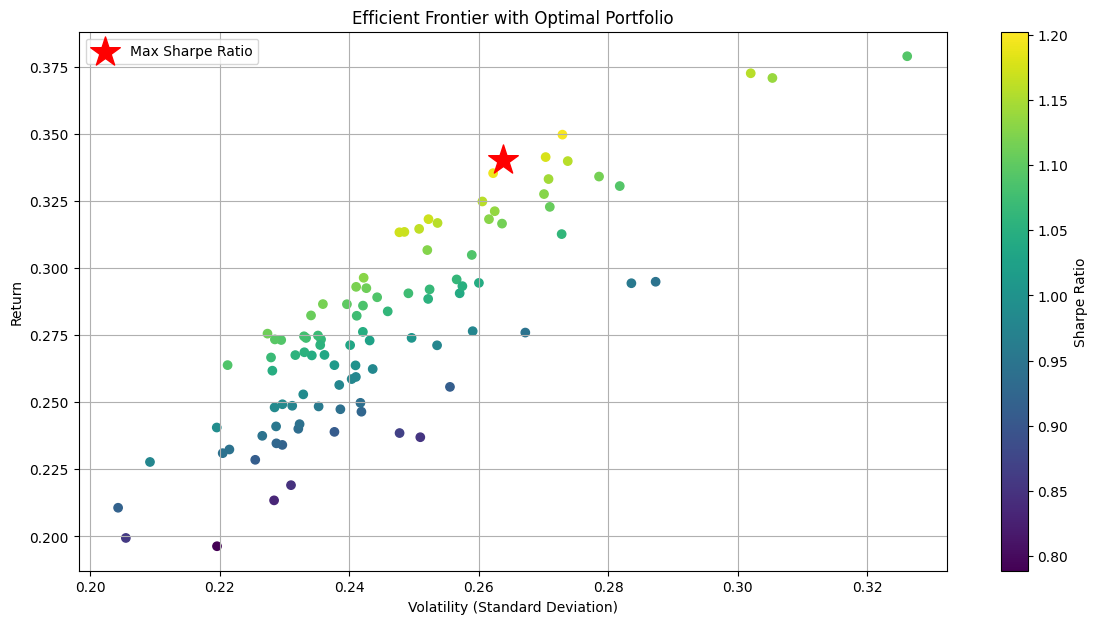

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], marker='*', color='r', s=500, label='Max Sharpe Ratio')
plt.title('Efficient Frontier with Optimal Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
expanded_df = results_df['Weights'].apply(pd.Series)

# Đặt lại tên các cột nếu cần
expanded_df.columns = ['AMZN', 'BRK-A', 'GOOG', 'AAPL', 'TSLA', 'NSFT', 'NOK', 'NVDA']

# Hiển thị kết quả
print(expanded_df)

        AMZN     BRK-A      GOOG      AAPL      TSLA      NSFT       NOK  \
0   0.098361  0.271668  0.112973  0.096030  0.020890  0.209543  0.159974   
1   0.110362  0.127441  0.059052  0.012714  0.219737  0.220440  0.089806   
2   0.073974  0.042287  0.164216  0.193234  0.147966  0.131267  0.083612   
3   0.092106  0.159218  0.071294  0.049354  0.166722  0.232304  0.018049   
4   0.041732  0.113604  0.239877  0.070309  0.057812  0.202234  0.232428   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.127885  0.073429  0.255519  0.048496  0.000252  0.242955  0.041363   
96  0.191191  0.023146  0.228507  0.101752  0.005744  0.042158  0.243300   
97  0.211328  0.049518  0.101274  0.210676  0.029051  0.036956  0.092888   
98  0.051860  0.123346  0.022140  0.188532  0.188655  0.072111  0.194063   
99  0.063050  0.197993  0.001051  0.179036  0.104686  0.241919  0.075718   

        NVDA  
0   0.030561  
1   0.160447  
2   0.163445  
3   0.210954  
4   0.042004

In [ ]:
daily_returns_df.to_csv('daily_returns_df.csv', index=False)


In [ ]:
expanded_df.to_csv('expanded_df.csv', index=False)